In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data3.csv')

In [3]:
grouped = df.groupby(['L/2', 'density', 'probability_of_spread', 'south_wind_speed', 'west_wind_speed', 'big-jumps'])

# Calculate the average of 'percentage-burned' within each group
df_avg = grouped['percentage-burned'].mean().reset_index()

In [4]:
df_avg

,L/2,density,probability_of_spread,south_wind_speed,west_wind_speed,big-jumps,percentage-burned
0,150.0,10.0,100.0,0.0,0.0,False,4.450904
1,150.0,20.0,100.0,0.0,0.0,False,2.495536
2,150.0,30.0,100.0,0.0,0.0,False,2.032742
3,150.0,40.0,100.0,0.0,0.0,False,2.125021
4,150.0,50.0,100.0,0.0,0.0,False,3.554735
5,150.0,60.0,100.0,0.0,0.0,False,62.358325
6,150.0,70.0,100.0,0.0,0.0,False,98.719566
7,200.0,10.0,100.0,0.0,0.0,False,4.432118
8,200.0,20.0,100.0,0.0,0.0,False,2.549834
9,200.0,30.0,100.0,0.0,0.0,False,2.040607


10%: [1.98529715 2.04214616 1.99020238 1.97010616 1.96230944 2.03391031
 1.98700101]
20%: [2.07482044 2.04866079 1.91579948 1.89696853 2.28691939 1.92414766
 1.71803488]
30%: [2.0134245  2.19010784 1.77505583 1.8987361  2.06125178 2.17185581
 2.10443358]
40%: [1.91486376 1.90884477 2.20911972 2.06858571 1.81302061 2.12135648
 2.00750422]
50%: [1.55817956 2.28036677 1.82863083 1.961779   1.35905711 2.57309551
 2.72437957]
60%: [2.49226009 1.36453038 2.26056885 2.81654039 0.58723837 2.88332447
 2.02277198]
70%: [1.99554752 2.00524958 1.9978906  1.99868084 2.00094138 2.00871617
 1.99876434]


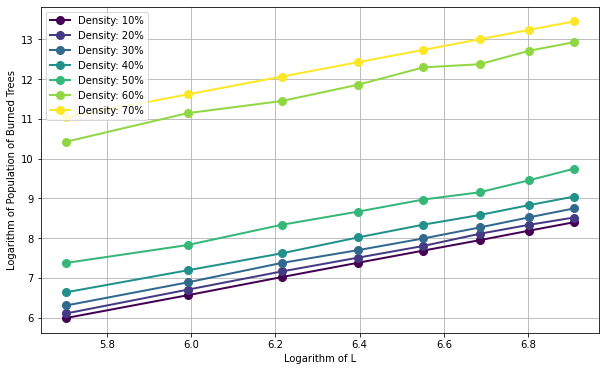

In [6]:
list_of_l_2 = [150, 200, 250, 300, 350, 400, 450, 500]
list_of_density = [10, 20, 30, 40, 50, 60, 70]

# Define a colormap
colormap = plt.cm.get_cmap('viridis', len(list_of_density))

# Initialize a figure and axis
plt.figure(figsize=(20, 12))
ax = plt.subplot(1, 1, 1)

for index, i in enumerate(list_of_density):
    # Filter conditions
    filtered_result = df_avg[
        (df_avg['density'] == i) &
        (df_avg['probability_of_spread'] == 100) &
        (df_avg['south_wind_speed'] == 0) &
        (df_avg['west_wind_speed'] == 0) &
        (df_avg['big-jumps'] == False)
    ]

    # Data
    x = np.log(2 * filtered_result['L/2'])
    y = np.log(filtered_result['percentage-burned'] * filtered_result['density'] * 4 * filtered_result['L/2'] * filtered_result['L/2'] / 10000)
    
    # Perform linear regression
    coeffs = np.polyfit(x, y, 1)
    regression_line = np.polyval(coeffs, x)
    #print("Slope Corresponding to the Line of Density of " + str(i) + "%:" + str(coeffs[0]))

    # Get the color for this iteration using modulo
    color = color=colormap(index)

    # Plot the data points
    ax.scatter(x, y, color=color, label=f'Density = {i}%, Slope = {coeffs[0]}')

    # Plot the regression line
    ax.plot(x, regression_line, color=color, linestyle='dashed')

    # Add labels and legend
ax.set_xlabel('log(L)')
ax.set_ylabel('log(Population of Burned Trees)')
ax.set_title('Linear Regression Analysis')
ax.legend(fontsize='large')

# Save the plot
plt.grid(True)
plt.savefig("./Population of Burned Trees.png")

# Show the plot
plt.show()
